In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('/content/kc_house_data.csv')

In [99]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [100]:
#hear we are gonna pridict house prise based on lotarea and bedroom
print(df.columns)
print(df.shape)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
(21613, 21)


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [102]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living','floors','view', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15']]
print(df.describe())

              price      bedrooms     bathrooms   sqft_living        floors  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   5.400881e+05      3.370842      2.114757   2079.899736      1.494309   
std    3.671272e+05      0.930062      0.770163    918.440897      0.539989   
min    7.500000e+04      0.000000      0.000000    290.000000      1.000000   
25%    3.219500e+05      3.000000      1.750000   1427.000000      1.000000   
50%    4.500000e+05      3.000000      2.250000   1910.000000      1.500000   
75%    6.450000e+05      4.000000      2.500000   2550.000000      2.000000   
max    7.700000e+06     33.000000      8.000000  13540.000000      3.500000   

               view         grade    sqft_above  sqft_basement  sqft_living15  
count  21613.000000  21613.000000  21611.000000   21613.000000   21613.000000  
mean       0.234303      7.656873   1788.396095     291.509045    1986.552492  
std        0.766318      1.175459    828.128162 

In [103]:
df['sqft_above'] = df['sqft_above'].fillna(df['sqft_above'].mean())
print(df.isna().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
view             0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
dtype: int64


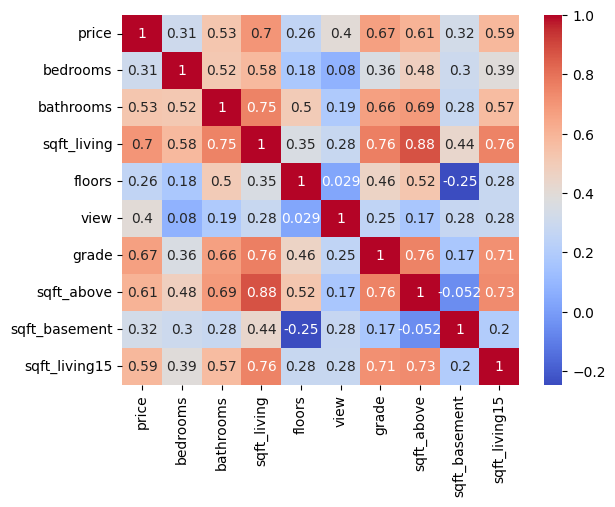

In [104]:
# Heatmap for better visualization of correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Mean Squared Error: 5.571401826726629e-21
R-squared: 1.0
Coefficients: [ 1.00000000e+00  2.03336801e-13  6.46424508e-14  6.12262920e-14
  2.15737478e-12  2.39993435e-13 -1.32172167e-12 -6.05353852e-14
 -5.89186082e-14 -7.79852260e-16]
Intercept: 1.1641532182693481e-10


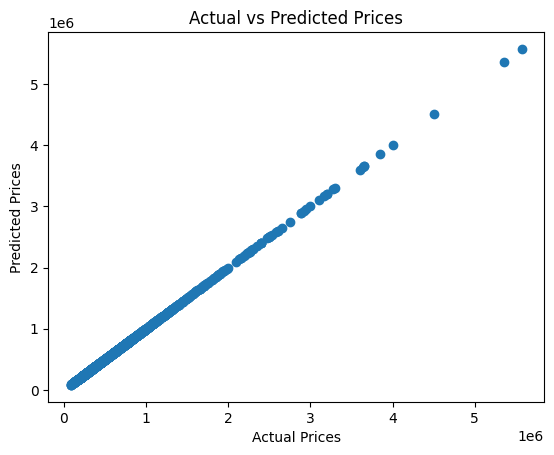

In [105]:
X = df[['price', 'bedrooms', 'bathrooms', 'sqft_living','floors','view', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15']]
y = df['price']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# predicted vs actual values plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

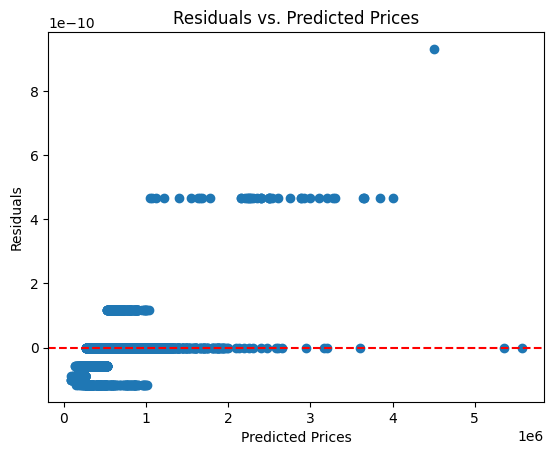

In [96]:
# minor residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()